In [17]:
!pip install scikit-learn --upgrade --user
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
import os.path as pt
import pandas as pd 
import tensorflow.keras.backend as K
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

Requirement already up-to-date: scikit-learn in c:\users\abder\appdata\local\continuum\anaconda3\lib\site-packages (0.24.2)


In [18]:
train_labels = pd . read_csv ("../../data/CONLL2003/bilass-eng.train.true_labels.csv",header=None)
data_train = pd .read_csv ( "../../data/CONLL2003/eng.train.representation.csv",header=None)

In [19]:
train_labels.head()

,0
0,0
1,0
2,1
3,0
4,0


In [20]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.451033,-0.488318,-0.255821,-0.137809,-0.048144,-0.043957,0.451039,0.102954,0.089547,0.076664,...,-0.218669,0.682409,-0.473345,-0.009874,-0.384008,0.140692,-0.012692,0.165181,0.058889,-0.390648
1,-0.239333,0.775531,-0.174063,0.158301,0.297638,-0.129337,-0.097236,0.108740,0.044130,0.123633,...,-0.284584,-0.256766,-0.431447,-0.649766,0.353310,-0.230163,0.944858,0.927042,-0.460076,0.182715
2,0.352255,-0.454496,-0.261688,0.499608,0.449225,0.034397,0.131889,0.089818,-0.471335,0.164576,...,-0.076328,-0.044453,-0.238135,-0.054626,-0.462026,-0.789696,-0.154895,1.240298,0.455828,0.015615
3,0.087985,-0.015801,0.396414,-0.428971,0.338345,0.275210,0.275715,0.667979,-0.576721,0.375074,...,0.185164,0.584429,0.045648,-0.084590,-0.800641,0.129176,-0.069257,0.174006,-0.166303,0.274083
4,-0.219841,-0.365603,-0.060525,-0.088899,0.053416,0.027642,-0.257103,0.180212,0.053477,-0.075219,...,-0.260747,0.155433,-0.227329,0.002219,0.180378,0.393444,0.015168,0.191013,-0.225727,0.188366


In [21]:
data_train.shape

(5000, 768)

In [22]:
##Scale the data

scaler=StandardScaler()
data_train = scaler.fit_transform (data_train)

In [23]:
## build model 

# input
in_=keras.Input(shape=data_train.shape[1])

##Couche cachée
lay=layers.Dense(units=6,)(in_)

#couche cachée
lay=layers.Dense(units=12,)(lay)

#couche de sortie
sortie=layers.Dense(units=1,activation='sigmoid')(lay)
model=keras.models.Model(in_,sortie)

## The model plot 

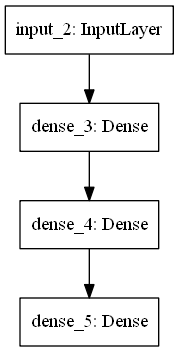

In [24]:
plot_model(model)

## Model summary

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 768)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 4614      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 4,711
Trainable params: 4,711
Non-trainable params: 0
_________________________________________________________________


In [26]:
## compiler le modèle 

metrics=['binary_accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()
        ]
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [27]:
# entrainer le modèle
epochs= 20
batch_size=8
history=model.fit(data_train,train_labels,epochs=epochs,batch_size=batch_size,verbose=2)

Epoch 1/20
625/625 - 1s - loss: 0.2506 - binary_accuracy: 0.9306 - auc_1: 0.9690 - precision_1: 0.4373 - recall_1: 0.9127
Epoch 2/20
625/625 - 1s - loss: 0.0358 - binary_accuracy: 0.9942 - auc_1: 0.9855 - precision_1: 0.9489 - recall_1: 0.9455
Epoch 3/20
625/625 - 0s - loss: 0.0235 - binary_accuracy: 0.9936 - auc_1: 0.9974 - precision_1: 0.9620 - recall_1: 0.9200
Epoch 4/20
625/625 - 0s - loss: 0.0128 - binary_accuracy: 0.9970 - auc_1: 0.9977 - precision_1: 0.9815 - recall_1: 0.9636
Epoch 5/20
625/625 - 0s - loss: 0.0127 - binary_accuracy: 0.9972 - auc_1: 0.9975 - precision_1: 0.9745 - recall_1: 0.9745
Epoch 6/20
625/625 - 0s - loss: 0.0060 - binary_accuracy: 0.9986 - auc_1: 0.9999 - precision_1: 0.9891 - recall_1: 0.9855
Epoch 7/20
625/625 - 0s - loss: 0.0068 - binary_accuracy: 0.9982 - auc_1: 0.9999 - precision_1: 0.9784 - recall_1: 0.9891
Epoch 8/20
625/625 - 0s - loss: 0.0063 - binary_accuracy: 0.9982 - auc_1: 0.9980 - precision_1: 0.9854 - recall_1: 0.9818
Epoch 9/20
625/625 - 0s 

Text(0.5, 0, 'epoch')

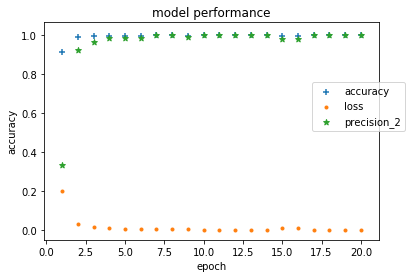

In [176]:
plt.scatter(range (1,epochs+1),history.history['binary_accuracy'],label="accuracy",marker ='+')
plt.scatter(range (1,epochs+1),history.history['loss'],label ="loss",marker ='.')
plt.scatter(range (1,epochs+1),history.history['precision'],label ="precision_2",marker ='*')
plt.title('model performance')
plt.legend(loc=[0.8,0.5])
plt.ylabel('accuracy')
plt.xlabel('epoch')

## Test evaluation  (A)

In [28]:
test_labels = pd . read_csv ("../../data/CONLL2003/bilass-eng.testa.true_labels.csv",header=None)
data_test = pd .read_csv ( "../../data/CONLL2003/eng.testa.representation.csv",header=None)
scaler1 = StandardScaler()
data_test=scaler1.fit_transform (data_test)

In [29]:
preds = model.predict (data_test)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
THRESHOLD= 0.5 
preds= (preds>THRESHOLD)

## As metrics we use precision, recall, accuracy, and F2 score which is more interseting than F1 score because we want to give more importance to recall than precision. Our objective is to detect all the personal data in the dataset and classify it correctly. So we should penalize low recalls with this F2 function.

## $$ F2= \frac{5 \times precision \times recall} {2\times precision+recall} $$

In [30]:
def print_metrics (metrics,preds,test_labels):
    precision = metrics [3]
    recall = metrics[4]
    accuracy=metrics[1]
    area_under_ROC=metrics[2]
    loss = metrics [0]
    
    # we will use F2 score which is more interseting because we want to give more importance to recall than precision
    f_score= fbeta_score(test_labels,preds,beta=2)
    f1_score=fbeta_score(test_labels,preds,beta=1)
    f5_score=fbeta_score(test_labels,preds,beta=5)
    
    print ('precision is ',precision)
    print ('recall is',recall)
    print ('accuracy is',accuracy)
    print ('loss is',loss)
    print ('area under ROC is',area_under_ROC)
    print ('f1_score is ', f1_score)
    print ('f2_score is ', f_score)
    print ('f5_score is ', f5_score)

In [31]:
metrics = model.evaluate (data_test,test_labels )
print_metrics(metrics,preds,test_labels)

157/157 [==============================] - 1s 1ms/step - loss: 0.0528 - binary_accuracy: 0.9922 - auc_1: 0.9804 - precision_1: 0.9554 - recall_1: 0.9231
precision is  0.9554139971733093
recall is 0.9230769276618958
accuracy is 0.9922000169754028
loss is 0.05284392833709717
area under ROC is 0.9803906083106995
f1_score is  0.9389671361502347
f2_score is  0.9293680297397771
f5_score is  0.9242801279772485


In [32]:
## Confusion matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,preds)
print ('the confusion matrix is \n ',cm)

the confusion matrix is 
  [[4661   14]
 [  25  300]]


### What if we chosse an optimal threshold instead of THRESHOLD = 0.5 

In [20]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve (test_labels, preds)

Text(0.5, 1.0, 'recall_precision curve for different thresholds')

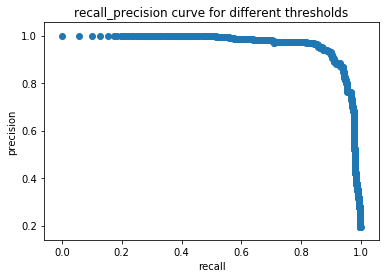

In [23]:
plt . scatter (recall, precision )
plt. xlabel ("recall")
plt.ylabel ("precision")
plt . title ("recall_precision curve for different thresholds")

## Test evaluation  (B)

In [33]:
test_labels_2 = pd . read_csv ("../../data/CONLL2003/bilass-eng.testb.true_labels.csv",header=None)
data_test_2 = pd .read_csv ( "../../data/CONLL2003/eng.testb.representation.csv",header=None)
scaler2 = StandardScaler()
data_test_2=scaler2.fit_transform (data_test_2)

In [34]:
preds_2 = model.predict (data_test_2)
## we will say that the prediction is labeled one when its probability exceeds the threshold = 0.5
preds_2= (preds_2>0.5)

In [35]:
metrics_2 = model.evaluate (data_test_2,test_labels_2 )
print_metrics(metrics_2,preds_2,test_labels_2)

157/157 [==============================] - 0s 946us/step - loss: 0.0554 - binary_accuracy: 0.9906 - auc_1: 0.9838 - precision_1: 0.9034 - recall_1: 0.9477
precision is  0.9034267663955688
recall is 0.9477124214172363
accuracy is 0.9905999898910522
loss is 0.055379919707775116
area under ROC is 0.9837770462036133
f1_score is  0.9250398724082933
f2_score is  0.9385113268608415
f5_score is  0.9459289925981683


## We have a f1_score and f2_scores which are very good but let's try to have  better scores

## R-fold cross validation to choose the best param for our model

for this we will use the gridsearch algorithm which tests all the combinaisons of params given and carries out a cross validation test on it to have the performance

In [39]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

In [36]:
def build(nbr_units=6):
    classifier = keras.models.Sequential()
    classifier.add( layers.Dense(units = nbr_units, input_dim = data_train.shape[1]))
    classifier.add(layers.Dense(units = 2*nbr_units))
    classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))
    
    metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)
   
    return classifier

# Grid search to tune the params

In [37]:
## scores to optimize when grid searching
scorings = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score), 'ftwo_score':make_scorer(fbeta_score,beta=2)}

In [40]:
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build)
parameters = {'batch_size': [12, 24],
              'epochs': [20,22],
              'nbr_units':[6,8]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = scorings,
                           cv = 10,
                          refit='ftwo_score')
grid_search = grid_search.fit(data_train, train_labels)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.5383 - accuracy: 0.7580 - auc_2: 0.8060 - precision_2: 0.1816 - recall_2: 0.7503  
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9907 - auc_2: 0.9920 - precision_2: 0.8978 - recall_2: 0.9300 
Epoch 3/20
375/375 [==============================] - 0s 931us/step - loss: 0.0277 - accuracy: 0.9943 - auc_2: 0.9926 - precision_2: 0.9525 - recall_2: 0.9271
Epoch 4/20
375/375 [==============================] - 0s 933us/step - loss: 0.0118 - accuracy: 0.9980 - auc_2: 0.9970 - precision_2: 0.9920 - recall_2: 0.9693
Epoch 5/20
375/375 [==============================] - 0s 921us/step - loss: 0.0106 - accuracy: 0.9981 - auc_2: 0.9992 - precision_2: 0.9796 - recall_2: 0.9869
Epoch 6/20
375/375 [==============================] - 0s 944us/step - loss: 0.0144 - accuracy: 0.9968 - auc_2: 0.9997 - precision_2: 0.9722 - recall_2: 0.9765
Epoch 7/20
375/375 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.5574 - accuracy: 0.7249 - auc_3: 0.8038 - precision_3: 0.1624 - recall_3: 0.7567   
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9903 - auc_3: 0.9954 - precision_3: 0.8853 - recall_3: 0.9659
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9944 - auc_3: 0.9983 - precision_3: 0.9782 - recall_3: 0.9204
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9971 - auc_3: 0.9996 - precision_3: 0.9715 - recall_3: 0.9792
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9978 - auc_3: 0.9858 - precision_3: 0.9700 - recall_3: 0.9711    
Epoch 6/20
375/375 [==============================] - 0s 997us/step - loss: 0.0096 - accuracy: 0.9985 - auc_3: 0.9989 - precision_3: 0.9864 - recall_3: 0.9871
Epoch 7/20
375/375 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7500 - auc_4: 0.8526 - precision_4: 0.1871 - recall_4: 0.8403   
Epoch 2/20
375/375 [==============================] - 0s 989us/step - loss: 0.0764 - accuracy: 0.9922 - auc_4: 0.9944 - precision_4: 0.9330 - recall_4: 0.9425
Epoch 3/20
375/375 [==============================] - 0s 915us/step - loss: 0.0274 - accuracy: 0.9968 - auc_4: 0.9933 - precision_4: 0.9821 - recall_4: 0.9505
Epoch 4/20
375/375 [==============================] - 0s 936us/step - loss: 0.0159 - accuracy: 0.9967 - auc_4: 0.9833 - precision_4: 0.9515 - recall_4: 0.9499
Epoch 5/20
375/375 [==============================] - 0s 925us/step - loss: 0.0129 - accuracy: 0.9980 - auc_4: 0.9970 - precision_4: 0.9776 - recall_4: 0.9818
Epoch 6/20
375/375 [==============================] - 0s 939us/step - loss: 0.0049 - accuracy: 0.9996 - auc_4: 1.0000 - precision_4: 0.9970 - recall_4: 0.9959
Epoch 7/20
375/375 [==============================] - 0s

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.4961 - accuracy: 0.7841 - auc_5: 0.8756 - precision_5: 0.2107 - recall_5: 0.8653  
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9915 - auc_5: 0.9905 - precision_5: 0.9066 - recall_5: 0.9285 
Epoch 3/20
375/375 [==============================] - 0s 883us/step - loss: 0.0270 - accuracy: 0.9958 - auc_5: 0.9931 - precision_5: 0.9494 - recall_5: 0.9558
Epoch 4/20
375/375 [==============================] - 0s 893us/step - loss: 0.0141 - accuracy: 0.9974 - auc_5: 0.9968 - precision_5: 0.9802 - recall_5: 0.9696
Epoch 5/20
375/375 [==============================] - 0s 877us/step - loss: 0.0091 - accuracy: 0.9976 - auc_5: 0.9999 - precision_5: 0.9749 - recall_5: 0.9864
Epoch 6/20
375/375 [==============================] - 0s 888us/step - loss: 0.0075 - accuracy: 0.9989 - auc_5: 0.9972 - precision_5: 0.9923 - recall_5: 0.9826
Epoch 7/20
375/375 [==============================] - 0s 8

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



375/375 [==============================] - 1s 967us/step - loss: 0.5593 - accuracy: 0.7377 - auc_6: 0.8246 - precision_6: 0.1745 - recall_6: 0.8320 
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9928 - auc_6: 0.9835 - precision_6: 0.8973 - recall_6: 0.9462 
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9944 - auc_6: 0.9985 - precision_6: 0.9370 - recall_6: 0.9567A: 0s - loss: 0.0302 - accuracy: 0.9949 - auc_6: 0.9989 - precision_6: 0.9373 - recall_6: 0.9
Epoch 4/20
375/375 [==============================] - 0s 948us/step - loss: 0.0175 - accuracy: 0.9967 - auc_6: 0.9950 - precision_6: 0.9679 - recall_6: 0.9673
Epoch 5/20
375/375 [==============================] - 0s 918us/step - loss: 0.0135 - accuracy: 0.9972 - auc_6: 0.9997 - precision_6: 0.9767 - recall_6: 0.9717
Epoch 6/20
375/375 [==============================] - 0s 872us/step - loss: 0.0066 - accuracy: 0.9989 - auc_6: 1.0000 - prec

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6123 - accuracy: 0.7135 - auc_7: 0.8281 - precision_7: 0.1597 - recall_7: 0.8469
Epoch 2/20
375/375 [==============================] - 0s 971us/step - loss: 0.0891 - accuracy: 0.9891 - auc_7: 0.9906 - precision_7: 0.8911 - recall_7: 0.9322
Epoch 3/20
375/375 [==============================] - 0s 899us/step - loss: 0.0255 - accuracy: 0.9957 - auc_7: 0.9897 - precision_7: 0.9546 - recall_7: 0.9464
Epoch 4/20
375/375 [==============================] - 0s 899us/step - loss: 0.0163 - accuracy: 0.9968 - auc_7: 0.9923 - precision_7: 0.9747 - recall_7: 0.9617
Epoch 5/20
375/375 [==============================] - 0s 901us/step - loss: 0.0178 - accuracy: 0.9966 - auc_7: 0.9961 - precision_7: 0.9701 - recall_7: 0.9598
Epoch 6/20
375/375 [==============================] - 0s 896us/step - loss: 0.0064 - accuracy: 0.9985 - auc_7: 0.9942 - precision_7: 0.9779 - recall_7: 0.9817    
Epoch 7/20
375/375 [========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
375/375 [==============================] - 2s 2ms/step - loss: 0.7026 - accuracy: 0.6962 - auc_8: 0.7658 - precision_8: 0.1394 - recall_8: 0.7494
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9933 - auc_8: 0.9910 - precision_8: 0.9254 - recall_8: 0.9544
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9936 - auc_8: 0.9967 - precision_8: 0.9677 - recall_8: 0.9107
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9978 - auc_8: 0.9999 - precision_8: 0.9842 - recall_8: 0.9761
Epoch 5/20
375/375 [==============================] - 0s 915us/step - loss: 0.0209 - accuracy: 0.9952 - auc_8: 0.9847 - precision_8: 0.9585 - recall_8: 0.9376
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9978 - auc_8: 0.9944 - precision_8: 0.9807 - recall_8: 0.9639 
Epoch 7/20
375/375 [==============================] - 0

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 981us/step - loss: 0.5757 - accuracy: 0.7405 - auc_9: 0.8285 - precision_9: 0.1634 - recall_9: 0.7767
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9929 - auc_9: 0.9946 - precision_9: 0.9265 - recall_9: 0.9420A: 0s - loss: 0.0891 - accuracy: 0.9931 - auc_9: 0.9955 - precision_9: 0.9245 - recall_9: 0.9
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9961 - auc_9: 0.9870 - precision_9: 0.9686 - recall_9: 0.9398 
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9929 - auc_9: 0.9863 - precision_9: 0.9220 - recall_9: 0.9057
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9972 - auc_9: 0.9991 - precision_9: 0.9971 - recall_9: 0.9581
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9990 - auc_9: 0.9969 - precision_9:

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.6687 - accuracy: 0.6909 - auc_10: 0.8089 - precision_10: 0.1483 - recall_10: 0.8072
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9934 - auc_10: 0.9886 - precision_10: 0.9308 - recall_10: 0.9463
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9916 - auc_10: 0.9971 - precision_10: 0.9398 - recall_10: 0.9110
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0163 - accuracy: 0.9970 - auc_10: 0.9976 - precision_10: 0.9728 - recall_10: 0.9725
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9974 - auc_10: 0.9998 - precision_10: 0.9824 - recall_10: 0.9701
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9961 - auc_10: 0.9892 - precision_10: 0.9638 - recall_10: 0.9458
Epoch 7/20
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7395 - auc_11: 0.7898 - precision_11: 0.1713 - recall_11: 0.7740
Epoch 2/20
375/375 [==============================] - 0s 935us/step - loss: 0.0810 - accuracy: 0.9915 - auc_11: 0.9917 - precision_11: 0.9173 - recall_11: 0.9295
Epoch 3/20
375/375 [==============================] - 0s 928us/step - loss: 0.0260 - accuracy: 0.9955 - auc_11: 0.9929 - precision_11: 0.9635 - recall_11: 0.9429
Epoch 4/20
375/375 [==============================] - 0s 983us/step - loss: 0.0191 - accuracy: 0.9958 - auc_11: 0.9983 - precision_11: 0.9509 - recall_11: 0.9679
Epoch 5/20
375/375 [==============================] - 0s 938us/step - loss: 0.0145 - accuracy: 0.9964 - auc_11: 0.9943 - precision_11: 0.9647 - recall_11: 0.9545
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9989 - auc_11: 0.9999 - precision_11: 0.9979 - recall_11: 0.9819
Epoch 7/20
375/375 [=======================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7477 - auc_12: 0.8786 - precision_12: 0.1870 - recall_12: 0.8404
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9918 - auc_12: 0.9883 - precision_12: 0.9212 - recall_12: 0.9400: 0s - loss: 0.0780 - accuracy: 0.9919 - auc_12: 0.9879 - precision_12: 0.9218 - recall_12: 0.
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9941 - auc_12: 0.9932 - precision_12: 0.9500 - recall_12: 0.9366
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9943 - auc_12: 0.9874 - precision_12: 0.9665 - recall_12: 0.9249
Epoch 5/20
375/375 [==============================] - 0s 953us/step - loss: 0.0129 - accuracy: 0.9966 - auc_12: 0.9994 - precision_12: 0.9779 - recall_12: 0.9583
Epoch 6/20
375/375 [==============================] - 0s 952us/step - loss: 0.0107 - accuracy: 0.9978 - auc_12: 0.9

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 986us/step - loss: 0.5427 - accuracy: 0.7347 - auc_13: 0.8449 - precision_13: 0.1727 - recall_13: 0.8329
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9941 - auc_13: 0.9977 - precision_13: 0.9416 - recall_13: 0.9552: 0s - loss: 0.0877 - accuracy: 0.9938 - auc_13: 0.9987 - precision_13: 0.9337 - recall_13
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9971 - auc_13: 0.9960 - precision_13: 0.9808 - recall_13: 0.9608
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.9974 - auc_13: 0.9998 - precision_13: 0.9653 - recall_13: 0.9931
Epoch 5/20
375/375 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9983 - auc_13: 0.9911 - precision_13: 0.9739 - recall_13: 0.97 - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9982 - auc_13: 0.9919 - precision_13: 0.9751 - recall_13: 0.9725
Epoch 6/20
375/37

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 957us/step - loss: 0.5997 - accuracy: 0.7530 - auc_14: 0.8910 - precision_14: 0.1840 - recall_14: 0.9187
Epoch 2/20
375/375 [==============================] - 0s 903us/step - loss: 0.0781 - accuracy: 0.9876 - auc_14: 0.9950 - precision_14: 0.8991 - recall_14: 0.9059
Epoch 3/20
375/375 [==============================] - 0s 910us/step - loss: 0.0308 - accuracy: 0.9932 - auc_14: 0.9973 - precision_14: 0.9609 - recall_14: 0.9119
Epoch 4/20
375/375 [==============================] - 0s 934us/step - loss: 0.0204 - accuracy: 0.9961 - auc_14: 0.9949 - precision_14: 0.9652 - recall_14: 0.9562
Epoch 5/20
375/375 [==============================] - 0s 926us/step - loss: 0.0098 - accuracy: 0.9975 - auc_14: 0.9998 - precision_14: 0.9815 - recall_14: 0.9737
Epoch 6/20
375/375 [==============================] - 0s 933us/step - loss: 0.0082 - accuracy: 0.9983 - auc_14: 0.9972 - precision_14: 0.9844 - recall_14: 0.9808
Epoch 7/20
375/375 [===================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 999us/step - loss: 0.5271 - accuracy: 0.7689 - auc_15: 0.8820 - precision_15: 0.2072 - recall_15: 0.8849
Epoch 2/20
375/375 [==============================] - 0s 997us/step - loss: 0.0688 - accuracy: 0.9916 - auc_15: 0.9894 - precision_15: 0.9101 - recall_15: 0.9331
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9934 - auc_15: 0.9967 - precision_15: 0.9397 - recall_15: 0.9429
Epoch 4/20
375/375 [==============================] - 0s 902us/step - loss: 0.0159 - accuracy: 0.9978 - auc_15: 0.9927 - precision_15: 0.9921 - recall_15: 0.9676
Epoch 5/20
375/375 [==============================] - 0s 893us/step - loss: 0.0185 - accuracy: 0.9953 - auc_15: 0.9898 - precision_15: 0.9387 - recall_15: 0.9648
Epoch 6/20
375/375 [==============================] - 0s 891us/step - loss: 0.0056 - accuracy: 0.9997 - auc_15: 0.9892 - precision_15: 0.9891 - recall_15: 0.9838
Epoch 7/20
375/375 [=====================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5438 - accuracy: 0.7411 - auc_16: 0.8488 - precision_16: 0.1670 - recall_16: 0.8050
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9923 - auc_16: 0.9953 - precision_16: 0.9327 - recall_16: 0.9062
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9958 - auc_16: 0.9984 - precision_16: 0.9678 - recall_16: 0.9582
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9986 - auc_16: 0.9959 - precision_16: 0.9894 - recall_16: 0.9802
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9977 - auc_16: 0.9936 - precision_16: 0.9735 - recall_16: 0.9750
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 0.9982 - auc_16: 0.9973 - precision_16: 0.9779 - recall_16: 0.9868
Epoch 7/20
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
375/375 [==============================] - 1s 939us/step - loss: 0.5473 - accuracy: 0.7382 - auc_17: 0.8542 - precision_17: 0.1851 - recall_17: 0.8328
Epoch 2/20
375/375 [==============================] - 0s 919us/step - loss: 0.0720 - accuracy: 0.9912 - auc_17: 0.9950 - precision_17: 0.8975 - recall_17: 0.9484
Epoch 3/20
375/375 [==============================] - 0s 935us/step - loss: 0.0218 - accuracy: 0.9964 - auc_17: 0.9967 - precision_17: 0.9733 - recall_17: 0.9544
Epoch 4/20
375/375 [==============================] - 0s 927us/step - loss: 0.0169 - accuracy: 0.9970 - auc_17: 0.9993 - precision_17: 0.9824 - recall_17: 0.9672
Epoch 5/20
375/375 [==============================] - 0s 924us/step - loss: 0.0116 - accuracy: 0.9984 - auc_17: 0.9992 - precision_17: 0.9807 - recall_17: 0.9939
Epoch 6/20
375/375 [==============================] - 0s 937us/step - loss: 0.0099 - accuracy: 0.9987 - auc_17: 0.9985 - precision_17: 0.9883 - recall_17: 0.9873
Epoch 7/20
375/375 [========

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.5164 - accuracy: 0.7625 - auc_18: 0.8898 - precision_18: 0.2144 - recall_18: 0.9094
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9931 - auc_18: 0.9939 - precision_18: 0.9330 - recall_18: 0.9224
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9937 - auc_18: 0.9978 - precision_18: 0.9538 - recall_18: 0.9324
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9972 - auc_18: 0.9969 - precision_18: 0.9766 - recall_18: 0.9671
Epoch 5/20
375/375 [==============================] - 0s 988us/step - loss: 0.0114 - accuracy: 0.9971 - auc_18: 0.9994 - precision_18: 0.9783 - recall_18: 0.9663
Epoch 6/20
375/375 [==============================] - 0s 918us/step - loss: 0.0065 - accuracy: 0.9984 - auc_18: 0.9999 - precision_18: 0.9909 - recall_18: 0.9809
Epoch 7/20
375/375 [================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7506 - auc_19: 0.8692 - precision_19: 0.1862 - recall_19: 0.8624
Epoch 2/20
375/375 [==============================] - 0s 909us/step - loss: 0.0683 - accuracy: 0.9889 - auc_19: 0.9923 - precision_19: 0.8937 - recall_19: 0.8936
Epoch 3/20
375/375 [==============================] - 0s 901us/step - loss: 0.0203 - accuracy: 0.9976 - auc_19: 0.9980 - precision_19: 0.9914 - recall_19: 0.9649
Epoch 4/20
375/375 [==============================] - 0s 906us/step - loss: 0.0141 - accuracy: 0.9965 - auc_19: 0.9963 - precision_19: 0.9870 - recall_19: 0.9365
Epoch 5/20
375/375 [==============================] - 0s 921us/step - loss: 0.0135 - accuracy: 0.9965 - auc_19: 0.9963 - precision_19: 0.9614 - recall_19: 0.9749
Epoch 6/20
375/375 [==============================] - 0s 921us/step - loss: 0.0104 - accuracy: 0.9980 - auc_19: 0.9997 - precision_19: 0.9801 - recall_19: 0.9824
Epoch 7/20
375/375 [=====================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 981us/step - loss: 0.6276 - accuracy: 0.7282 - auc_20: 0.8211 - precision_20: 0.1567 - recall_20: 0.8081
Epoch 2/20
375/375 [==============================] - 0s 950us/step - loss: 0.0725 - accuracy: 0.9936 - auc_20: 0.9938 - precision_20: 0.9236 - recall_20: 0.9553
Epoch 3/20
375/375 [==============================] - 0s 925us/step - loss: 0.0314 - accuracy: 0.9921 - auc_20: 0.9907 - precision_20: 0.9205 - recall_20: 0.9030
Epoch 4/20
375/375 [==============================] - 0s 997us/step - loss: 0.0209 - accuracy: 0.9961 - auc_20: 0.9934 - precision_20: 0.9790 - recall_20: 0.9386
Epoch 5/20
375/375 [==============================] - 0s 981us/step - loss: 0.0130 - accuracy: 0.9957 - auc_20: 0.9995 - precision_20: 0.9550 - recall_20: 0.97180s - loss: 0.0120 - accuracy: 0.9962 - auc_20: 0.9998 - precision_20: 0.9587 - recall_20: 
Epoch 6/20
375/375 [==============================] - 0s 936us/step - loss: 0.0108 - accuracy: 0.9970 - auc_20:

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7555 - auc_21: 0.8421 - precision_21: 0.1776 - recall_21: 0.7892
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9924 - auc_21: 0.9948 - precision_21: 0.9310 - recall_21: 0.9326
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9940 - auc_21: 0.9956 - precision_21: 0.9385 - recall_21: 0.9450
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9961 - auc_21: 0.9900 - precision_21: 0.9835 - recall_21: 0.9534
Epoch 5/20
375/375 [==============================] - 0s 976us/step - loss: 0.0163 - accuracy: 0.9952 - auc_21: 0.9986 - precision_21: 0.9597 - recall_21: 0.9515
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.9996 - auc_21: 0.9998 - precision_21: 0.9966 - recall_21: 0.9966
Epoch 7/20
375/375 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5752 - accuracy: 0.7202 - auc_22: 0.8436 - precision_22: 0.1543 - recall_22: 0.7990
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9916 - auc_22: 0.9876 - precision_22: 0.8991 - recall_22: 0.9237
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9936 - auc_22: 0.9981 - precision_22: 0.9522 - recall_22: 0.9337
Epoch 4/22
375/375 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9960 - auc_22: 0.9950 - precision_22: 0.9713 - recall_22: 0.9573   - ETA: 0s - loss: 0.0195 - accuracy: 0.9961 - auc_22: 0.9945 - precision_22: 0.9712 - recall_22: 0. - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9960 - auc_22: 0.9951 - precision_22: 0.9711 - recall_22: 0.9563
Epoch 5/22
375/375 [==============================] - 0s 969us/step - loss: 0.0117 - accuracy: 0.9975 - auc_22: 0.9997 - precision_22: 0.9853 - recall_22: 0.9707
Epo

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.7298 - auc_23: 0.8258 - precision_23: 0.1734 - recall_23: 0.8003
Epoch 2/22
375/375 [==============================] - 0s 967us/step - loss: 0.0834 - accuracy: 0.9906 - auc_23: 0.9947 - precision_23: 0.8991 - recall_23: 0.9406
Epoch 3/22
375/375 [==============================] - 0s 922us/step - loss: 0.0297 - accuracy: 0.9948 - auc_23: 0.9977 - precision_23: 0.9551 - recall_23: 0.9469
Epoch 4/22
375/375 [==============================] - 0s 932us/step - loss: 0.0217 - accuracy: 0.9952 - auc_23: 0.9954 - precision_23: 0.9637 - recall_23: 0.9428
Epoch 5/22
375/375 [==============================] - 0s 936us/step - loss: 0.0110 - accuracy: 0.9976 - auc_23: 0.9998 - precision_23: 0.9703 - recall_23: 0.9846
Epoch 6/22
375/375 [==============================] - 0s 941us/step - loss: 0.0149 - accuracy: 0.9970 - auc_23: 0.9991 - precision_23: 0.9772 - recall_23: 0.9706
Epoch 7/22
375/375 [=====================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 996us/step - loss: 0.5747 - accuracy: 0.7330 - auc_24: 0.7962 - precision_24: 0.1646 - recall_24: 0.7444
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9904 - auc_24: 0.9912 - precision_24: 0.9247 - recall_24: 0.9065
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9969 - auc_24: 0.9967 - precision_24: 0.9741 - recall_24: 0.9678
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9962 - auc_24: 0.9968 - precision_24: 0.9667 - recall_24: 0.9626
Epoch 5/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9978 - auc_24: 0.9864 - precision_24: 0.9763 - recall_24: 0.9548
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9987 - auc_24: 0.9894 - precision_24: 0.9739 - recall_24: 0.9791
Epoch 7/22
375/375 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 906us/step - loss: 0.5221 - accuracy: 0.7647 - auc_25: 0.8866 - precision_25: 0.2106 - recall_25: 0.8853
Epoch 2/22
375/375 [==============================] - 0s 900us/step - loss: 0.0743 - accuracy: 0.9930 - auc_25: 0.9968 - precision_25: 0.9227 - recall_25: 0.9602
Epoch 3/22
375/375 [==============================] - 0s 910us/step - loss: 0.0267 - accuracy: 0.9945 - auc_25: 0.9942 - precision_25: 0.9650 - recall_25: 0.9284
Epoch 4/22
375/375 [==============================] - 0s 903us/step - loss: 0.0145 - accuracy: 0.9979 - auc_25: 0.9939 - precision_25: 0.9851 - recall_25: 0.9628
Epoch 5/22
375/375 [==============================] - 0s 921us/step - loss: 0.0169 - accuracy: 0.9955 - auc_25: 0.9956 - precision_25: 0.9545 - recall_25: 0.9610
Epoch 6/22
375/375 [==============================] - 0s 918us/step - loss: 0.0071 - accuracy: 0.9977 - auc_25: 0.9892 - precision_25: 0.9776 - recall_25: 0.9595
Epoch 7/22
375/375 [===================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7531 - auc_26: 0.7763 - precision_26: 0.1637 - recall_26: 0.7089
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9918 - auc_26: 0.9904 - precision_26: 0.8996 - recall_26: 0.9448
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9947 - auc_26: 0.9962 - precision_26: 0.9692 - recall_26: 0.9362
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9954 - auc_26: 0.9963 - precision_26: 0.9491 - recall_26: 0.9549
Epoch 5/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9964 - auc_26: 0.9958 - precision_26: 0.9577 - recall_26: 0.9806
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9980 - auc_26: 0.9942 - precision_26: 0.9764 - recall_26: 0.9731
Epoch 7/22
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.6832 - accuracy: 0.7070 - auc_27: 0.8962 - precision_27: 0.1499 - recall_27: 0.9093
Epoch 2/22
375/375 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9922 - auc_27: 0.9933 - precision_27: 0.9076 - recall_27: 0.94 - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9923 - auc_27: 0.9933 - precision_27: 0.9107 - recall_27: 0.9446
Epoch 3/22
375/375 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9963 - auc_27: 0.9986 - precision_27: 0.9763 - recall_27: 0.96 - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9962 - auc_27: 0.9983 - precision_27: 0.9754 - recall_27: 0.9603
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9958 - auc_27: 0.9969 - precision_27: 0.9509 - recall_27: 0.9715   - ETA: 0s - loss: 0.0143 - accuracy: 0.9953 - auc_27: 0.9947 - precision_27: 0.9413 - recall_27
Epoch 5/22
375/375 [==============================] - ETA: 0s - loss:

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.6139 - accuracy: 0.7297 - auc_28: 0.8724 - precision_28: 0.1719 - recall_28: 0.8634
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9921 - auc_28: 0.9955 - precision_28: 0.9166 - recall_28: 0.9439
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9950 - auc_28: 0.9974 - precision_28: 0.9834 - recall_28: 0.9375
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9966 - auc_28: 0.9939 - precision_28: 0.9664 - recall_28: 0.9592
Epoch 5/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9986 - auc_28: 0.9946 - precision_28: 0.9907 - recall_28: 0.9716
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9968 - auc_28: 0.9995 - precision_28: 0.9671 - recall_28: 0.9764
Epoch 7/22
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/22
375/375 [==============================] - 1s 1ms/step - loss: 0.5681 - accuracy: 0.7263 - auc_29: 0.8631 - precision_29: 0.1621 - recall_29: 0.8258
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9939 - auc_29: 0.9963 - precision_29: 0.9193 - recall_29: 0.9557: 0s - loss: 0.0861 - accuracy: 0.9940 - auc_29: 0.9968 - precision_29: 0.9184 - recall_29: 0.95
Epoch 3/22
375/375 [==============================] - 0s 984us/step - loss: 0.0326 - accuracy: 0.9937 - auc_29: 0.9969 - precision_29: 0.9587 - recall_29: 0.9301
Epoch 4/22
375/375 [==============================] - 0s 955us/step - loss: 0.0184 - accuracy: 0.9959 - auc_29: 0.9940 - precision_29: 0.9780 - recall_29: 0.9392
Epoch 5/22
375/375 [==============================] - 0s 912us/step - loss: 0.0098 - accuracy: 0.9992 - auc_29: 0.9996 - precision_29: 0.9917 - recall_29: 0.9937
Epoch 6/22
375/375 [==============================] - 0s 922us/step - loss: 0.0189 - accuracy: 0.9

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7449 - auc_30: 0.8469 - precision_30: 0.1819 - recall_30: 0.8372
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9900 - auc_30: 0.9861 - precision_30: 0.9152 - recall_30: 0.9044       - ETA: 0s - loss: 0.1097 - accuracy: 0.9855 - auc_30: 0.9644 - precision_30: 0.8504 - recal
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9952 - auc_30: 0.9938 - precision_30: 0.9708 - recall_30: 0.9417
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9974 - auc_30: 0.9985 - precision_30: 0.9855 - recall_30: 0.9702
Epoch 5/22
375/375 [==============================] - 0s 998us/step - loss: 0.0102 - accuracy: 0.9974 - auc_30: 0.9999 - precision_30: 0.9873 - recall_30: 0.9651
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9984 - auc_30: 0

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7304 - auc_31: 0.8409 - precision_31: 0.1781 - recall_31: 0.8028
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9899 - auc_31: 0.9878 - precision_31: 0.8796 - recall_31: 0.9233
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9938 - auc_31: 0.9976 - precision_31: 0.9481 - recall_31: 0.9502
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9948 - auc_31: 0.9960 - precision_31: 0.9527 - recall_31: 0.9489
Epoch 5/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.9987 - auc_31: 0.9941 - precision_31: 0.9867 - recall_31: 0.9790
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9989 - auc_31: 0.9972 - precision_31: 0.9877 - recall_31: 0.9864
Epoch 7/22
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.7344 - auc_32: 0.8164 - precision_32: 0.1687 - recall_32: 0.7721
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9908 - auc_32: 0.9937 - precision_32: 0.9353 - recall_32: 0.9086
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9957 - auc_32: 0.9969 - precision_32: 0.9734 - recall_32: 0.9486
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9966 - auc_32: 0.9969 - precision_32: 0.9724 - recall_32: 0.9589
Epoch 5/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9974 - auc_32: 0.9998 - precision_32: 0.9719 - recall_32: 0.9821
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9977 - auc_32: 0.9930 - precision_32: 0.9782 - recall_32: 0.9722
Epoch 7/22
375/375 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/22
375/375 [==============================] - 1s 982us/step - loss: 0.5436 - accuracy: 0.7371 - auc_33: 0.8689 - precision_33: 0.1814 - recall_33: 0.8687
Epoch 2/22
375/375 [==============================] - 0s 967us/step - loss: 0.0697 - accuracy: 0.9921 - auc_33: 0.9951 - precision_33: 0.9179 - recall_33: 0.9390
Epoch 3/22
375/375 [==============================] - 0s 979us/step - loss: 0.0203 - accuracy: 0.9964 - auc_33: 0.9994 - precision_33: 0.9742 - recall_33: 0.9651
Epoch 4/22
375/375 [==============================] - 0s 957us/step - loss: 0.0150 - accuracy: 0.9959 - auc_33: 0.9971 - precision_33: 0.9746 - recall_33: 0.9485
Epoch 5/22
375/375 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9982 - auc_33: 0.9936 - precision_33: 0.9773 - recall_33: 0.9752 - 0s 944us/step - loss: 0.0087 - accuracy: 0.9981 - auc_33: 0.9944 - precision_33: 0.9767 - recall_33: 0.9750
Epoch 6/22
375/375 [==============================] - 0s 940us/step - loss: 0.0059 - a

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/22
375/375 [==============================] - 1s 1ms/step - loss: 0.5905 - accuracy: 0.7295 - auc_34: 0.8500 - precision_34: 0.1733 - recall_34: 0.8379
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9945 - auc_34: 0.9869 - precision_34: 0.9413 - recall_34: 0.9489
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.9946 - auc_34: 0.9957 - precision_34: 0.9511 - recall_34: 0.9534
Epoch 4/22
375/375 [==============================] - 0s 946us/step - loss: 0.0201 - accuracy: 0.9951 - auc_34: 0.9859 - precision_34: 0.9543 - recall_34: 0.9338
Epoch 5/22
375/375 [==============================] - 0s 990us/step - loss: 0.0110 - accuracy: 0.9973 - auc_34: 0.9970 - precision_34: 0.9724 - recall_34: 0.9694
Epoch 6/22
375/375 [==============================] - 0s 918us/step - loss: 0.0066 - accuracy: 0.9986 - auc_34: 0.9946 - precision_34: 0.9841 - recall_34: 0.9804
Epoch 7/22
375/375 [==============

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/22
375/375 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7565 - auc_35: 0.9060 - precision_35: 0.2006 - recall_35: 0.9000
Epoch 2/22
375/375 [==============================] - 0s 930us/step - loss: 0.0765 - accuracy: 0.9900 - auc_35: 0.9908 - precision_35: 0.8901 - recall_35: 0.9234
Epoch 3/22
375/375 [==============================] - 0s 952us/step - loss: 0.0236 - accuracy: 0.9967 - auc_35: 0.9933 - precision_35: 0.9751 - recall_35: 0.9590
Epoch 4/22
375/375 [==============================] - 0s 936us/step - loss: 0.0123 - accuracy: 0.9976 - auc_35: 0.9923 - precision_35: 0.9819 - recall_35: 0.9627
Epoch 5/22
375/375 [==============================] - 0s 959us/step - loss: 0.0175 - accuracy: 0.9958 - auc_35: 0.9903 - precision_35: 0.9449 - recall_35: 0.9597
Epoch 6/22
375/375 [==============================] - 0s 939us/step - loss: 0.0089 - accuracy: 0.9971 - auc_35: 0.9998 - precision_35: 0.9826 - recall_35: 0.9692
Epoch 7/22
375/375 [==========

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7771 - auc_36: 0.7729 - precision_36: 0.1755 - recall_36: 0.6910
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9939 - auc_36: 0.9913 - precision_36: 0.9301 - recall_36: 0.9631
Epoch 3/22
375/375 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9942 - auc_36: 0.9959 - precision_36: 0.9598 - recall_36: 0.93 - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9941 - auc_36: 0.9961 - precision_36: 0.9581 - recall_36: 0.9302
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9970 - auc_36: 0.9938 - precision_36: 0.9775 - recall_36: 0.9573
Epoch 5/22
375/375 [==============================] - 0s 997us/step - loss: 0.0092 - accuracy: 0.9983 - auc_36: 0.9865 - precision_36: 0.9770 - recall_36: 0.9640
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9972 - auc_3

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7566 - auc_37: 0.8433 - precision_37: 0.1927 - recall_37: 0.8187
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9939 - auc_37: 0.9921 - precision_37: 0.9543 - recall_37: 0.9223
Epoch 3/22
375/375 [==============================] - 0s 860us/step - loss: 0.0254 - accuracy: 0.9962 - auc_37: 0.9984 - precision_37: 0.9614 - recall_37: 0.9636
Epoch 4/22
375/375 [==============================] - 0s 869us/step - loss: 0.0209 - accuracy: 0.9950 - auc_37: 0.9967 - precision_37: 0.9606 - recall_37: 0.9476
Epoch 5/22
375/375 [==============================] - 0s 849us/step - loss: 0.0084 - accuracy: 0.9989 - auc_37: 0.9998 - precision_37: 0.9863 - recall_37: 0.9941
Epoch 6/22
375/375 [==============================] - 0s 846us/step - loss: 0.0048 - accuracy: 0.9995 - auc_37: 1.0000 - precision_37: 0.9977 - recall_37: 0.9933
Epoch 7/22
375/375 [=======================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/22
375/375 [==============================] - 1s 887us/step - loss: 0.5634 - accuracy: 0.7402 - auc_38: 0.8258 - precision_38: 0.1774 - recall_38: 0.8315
Epoch 2/22
375/375 [==============================] - 0s 906us/step - loss: 0.0658 - accuracy: 0.9914 - auc_38: 0.9930 - precision_38: 0.8915 - recall_38: 0.9528
Epoch 3/22
375/375 [==============================] - 0s 906us/step - loss: 0.0244 - accuracy: 0.9955 - auc_38: 0.9958 - precision_38: 0.9561 - recall_38: 0.9627
Epoch 4/22
375/375 [==============================] - 0s 903us/step - loss: 0.0166 - accuracy: 0.9946 - auc_38: 0.9996 - precision_38: 0.9596 - recall_38: 0.9487
Epoch 5/22
375/375 [==============================] - 0s 908us/step - loss: 0.0295 - accuracy: 0.9913 - auc_38: 0.9896 - precision_38: 0.9134 - recall_38: 0.9380
Epoch 6/22
375/375 [==============================] - 0s 902us/step - loss: 0.0048 - accuracy: 0.9990 - auc_38: 0.9894 - precision_38: 0.9883 - recall_38: 0.9754
Epoch 7/22
375/375 [========

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - ETA: 0s - loss: 0.5752 - accuracy: 0.7012 - auc_39: 0.8091 - precision_39: 0.1384 - recall_39: 0.77 - 1s 921us/step - loss: 0.5533 - accuracy: 0.7200 - auc_39: 0.8256 - precision_39: 0.1528 - recall_39: 0.7889
Epoch 2/22
375/375 [==============================] - 0s 981us/step - loss: 0.0758 - accuracy: 0.9900 - auc_39: 0.9929 - precision_39: 0.8778 - recall_39: 0.9389
Epoch 3/22
375/375 [==============================] - 0s 976us/step - loss: 0.0233 - accuracy: 0.9959 - auc_39: 0.9935 - precision_39: 0.9468 - recall_39: 0.9622
Epoch 4/22
375/375 [==============================] - 0s 984us/step - loss: 0.0193 - accuracy: 0.9948 - auc_39: 0.9915 - precision_39: 0.9469 - recall_39: 0.9453
Epoch 5/22
375/375 [==============================] - 0s 988us/step - loss: 0.0077 - accuracy: 0.9990 - auc_39: 0.9969 - precision_39: 0.9806 - recall_39: 0.9950
Epoch 6/22
375/375 [==============================] - 0s 978us/step - loss: 0.0209 - accuracy: 0.99

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 961us/step - loss: 0.4969 - accuracy: 0.7855 - auc_40: 0.8456 - precision_40: 0.2118 - recall_40: 0.7694
Epoch 2/22
375/375 [==============================] - 0s 984us/step - loss: 0.0606 - accuracy: 0.9932 - auc_40: 0.9887 - precision_40: 0.9146 - recall_40: 0.9399: 0s - loss: 0.0608 - accuracy: 0.9932 - auc_40: 0.9888 - precision_40: 0.9147 - recall_40: 0.94
Epoch 3/22
375/375 [==============================] - 0s 987us/step - loss: 0.0211 - accuracy: 0.9971 - auc_40: 0.9958 - precision_40: 0.9690 - recall_40: 0.9700
Epoch 4/22
375/375 [==============================] - 0s 976us/step - loss: 0.0192 - accuracy: 0.9951 - auc_40: 0.9936 - precision_40: 0.9474 - recall_40: 0.9359
Epoch 5/22
375/375 [==============================] - 0s 959us/step - loss: 0.0073 - accuracy: 0.9986 - auc_40: 0.9971 - precision_40: 0.9930 - recall_40: 0.9759
Epoch 6/22
375/375 [==============================] - 0s 850us/step - loss: 0.0127 - accuracy: 0.9973 - a

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


375/375 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7455 - auc_41: 0.8750 - precision_41: 0.1899 - recall_41: 0.8569
Epoch 2/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9928 - auc_41: 0.9875 - precision_41: 0.9213 - recall_41: 0.9350
Epoch 3/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9951 - auc_41: 0.9985 - precision_41: 0.9713 - recall_41: 0.9416
Epoch 4/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9953 - auc_41: 0.9932 - precision_41: 0.9514 - recall_41: 0.9400
Epoch 5/22
375/375 [==============================] - 0s 965us/step - loss: 0.0105 - accuracy: 0.9981 - auc_41: 0.9945 - precision_41: 0.9711 - recall_41: 0.9846
Epoch 6/22
375/375 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9963 - auc_41: 0.9838 - precision_41: 0.9569 - recall_41: 0.9361
Epoch 7/22
375/375 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6203 - accuracy: 0.6700 - auc_42: 0.8120 - precision_42: 0.1527 - recall_42: 0.8389
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9833 - auc_42: 0.9923 - precision_42: 0.7871 - recall_42: 0.9545
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9926 - auc_42: 0.9914 - precision_42: 0.9276 - recall_42: 0.9296
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9917 - auc_42: 0.9967 - precision_42: 0.9034 - recall_42: 0.9567
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9977 - auc_42: 0.9867 - precision_42: 0.9763 - recall_42: 0.9616
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9972 - auc_42: 0.9980 - precision_42: 0.9869 - recall_42: 0.9604
Epoch 7/20
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
188/188 [==============================] - 1s 1ms/step - loss: 0.6376 - accuracy: 0.6610 - auc_43: 0.7699 - precision_43: 0.1212 - recall_43: 0.7686
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2075 - accuracy: 0.9754 - auc_43: 0.9965 - precision_43: 0.7205 - recall_43: 0.9766
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9947 - auc_43: 0.9985 - precision_43: 0.9439 - recall_43: 0.9714
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9955 - auc_43: 0.9994 - precision_43: 0.9460 - recall_43: 0.9663
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9975 - auc_43: 0.9970 - precision_43: 0.9820 - recall_43: 0.9754
Epoch 6/20
188/188 [==============================] - 0s 990us/step - loss: 0.0138 - accuracy: 0.9971 - auc_43: 0.9998 - precision_43: 0.9901 - recall_43: 0.9619
Epoch 7/20
188/188 [==================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6968 - auc_44: 0.9109 - precision_44: 0.1572 - recall_44: 0.9311
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9758 - auc_44: 0.9922 - precision_44: 0.7031 - recall_44: 0.9388
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9950 - auc_44: 0.9977 - precision_44: 0.9664 - recall_44: 0.9392
Epoch 4/20
188/188 [==============================] - 0s 985us/step - loss: 0.0272 - accuracy: 0.9968 - auc_44: 0.9992 - precision_44: 0.9732 - recall_44: 0.9661
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9977 - auc_44: 0.9998 - precision_44: 0.9816 - recall_44: 0.9766
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9972 - auc_44: 0.9843 - precision_44: 0.9635 - recall_44: 0.9626  
Epoch 7/20
188/188 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6997 - accuracy: 0.6567 - auc_45: 0.7725 - precision_45: 0.1218 - recall_45: 0.7975
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9847 - auc_45: 0.9943 - precision_45: 0.7932 - recall_45: 0.9784
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9940 - auc_45: 0.9882 - precision_45: 0.9148 - recall_45: 0.9198
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9983 - auc_45: 0.9991 - precision_45: 0.9872 - recall_45: 0.9804: 0s - loss: 0.0304 - accuracy: 0.9984 - auc_45: 0.9991 - precision_45: 0.9873 - recall_45: 0.98
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9983 - auc_45: 0.9995 - precision_45: 0.9833 - recall_45: 0.9838
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9972 - auc_45: 0.999

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.7335 - accuracy: 0.6436 - auc_46: 0.8297 - precision_46: 0.1189 - recall_46: 0.8492
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9749 - auc_46: 0.9912 - precision_46: 0.7132 - recall_46: 0.9469
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9946 - auc_46: 0.9969 - precision_46: 0.9459 - recall_46: 0.9561
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9972 - auc_46: 0.9967 - precision_46: 0.9828 - recall_46: 0.9617
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9976 - auc_46: 0.9983 - precision_46: 0.9898 - recall_46: 0.9645
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9978 - auc_46: 0.9993 - precision_46: 0.9756 - recall_46: 0.9813
Epoch 7/20
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



188/188 [==============================] - 1s 1ms/step - loss: 0.6287 - accuracy: 0.6873 - auc_47: 0.8062 - precision_47: 0.1274 - recall_47: 0.7698
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9787 - auc_47: 0.9849 - precision_47: 0.7522 - recall_47: 0.9236
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9947 - auc_47: 0.9964 - precision_47: 0.9607 - recall_47: 0.9451
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9947 - auc_47: 0.9944 - precision_47: 0.9636 - recall_47: 0.9408
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976 - auc_47: 0.9941 - precision_47: 0.9789 - recall_47: 0.9667
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9989 - auc_47: 0.9996 - precision_47: 0.9925 - recall_47: 0.9868
Epoch 7/20
188/188 [==============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6465 - accuracy: 0.6787 - auc_48: 0.8181 - precision_48: 0.1303 - recall_48: 0.8000    
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.9853 - auc_48: 0.9960 - precision_48: 0.7973 - recall_48: 0.9544
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9947 - auc_48: 0.9990 - precision_48: 0.9673 - recall_48: 0.9395
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9971 - auc_48: 0.9983 - precision_48: 0.9810 - recall_48: 0.9654
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9980 - auc_48: 0.9997 - precision_48: 0.9988 - recall_48: 0.9643
Epoch 6/20
188/188 [==============================] - 0s 1000us/step - loss: 0.0150 - accuracy: 0.9970 - auc_48: 0.9998 - precision_48: 0.9911 - recall_48: 0.9554
Epoch 7/20
188/188 [========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6520 - accuracy: 0.6574 - auc_49: 0.8271 - precision_49: 0.1404 - recall_49: 0.8291
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9644 - auc_49: 0.9921 - precision_49: 0.6276 - recall_49: 0.9523
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9929 - auc_49: 0.9953 - precision_49: 0.9186 - recall_49: 0.9485
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9975 - auc_49: 0.9980 - precision_49: 0.9883 - recall_49: 0.9649
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9964 - auc_49: 0.9984 - precision_49: 0.9753 - recall_49: 0.9567
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.9987 - auc_49: 0.9997 - precision_49: 0.9893 - recall_49: 0.9875
Epoch 7/20
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.7187 - accuracy: 0.6530 - auc_50: 0.8202 - precision_50: 0.1306 - recall_50: 0.8767
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9725 - auc_50: 0.9825 - precision_50: 0.6855 - recall_50: 0.9343
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9931 - auc_50: 0.9815 - precision_50: 0.9205 - recall_50: 0.9438
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9968 - auc_50: 0.9970 - precision_50: 0.9832 - recall_50: 0.9590
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9974 - auc_50: 0.9992 - precision_50: 0.9835 - recall_50: 0.9713
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9977 - auc_50: 0.9997 - precision_50: 0.9885 - recall_50: 0.9714
Epoch 7/20
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6764 - accuracy: 0.6424 - auc_51: 0.7816 - precision_51: 0.1173 - recall_51: 0.8077  
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9717 - auc_51: 0.9955 - precision_51: 0.6743 - recall_51: 0.9749
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9930 - auc_51: 0.9950 - precision_51: 0.9149 - recall_51: 0.9622
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9951 - auc_51: 0.9987 - precision_51: 0.9629 - recall_51: 0.9504
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9952 - auc_51: 0.9932 - precision_51: 0.9603 - recall_51: 0.9497  
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9975 - auc_51: 0.9998 - precision_51: 0.9827 - recall_51: 0.9705
Epoch 7/20
188/188 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.7067 - auc_52: 0.8290 - precision_52: 0.1546 - recall_52: 0.8253  
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1558 - accuracy: 0.9876 - auc_52: 0.9968 - precision_52: 0.8292 - recall_52: 0.9755
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9957 - auc_52: 0.9986 - precision_52: 0.9706 - recall_52: 0.9507
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9972 - auc_52: 0.9985 - precision_52: 0.9894 - recall_52: 0.9586
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9962 - auc_52: 0.9991 - precision_52: 0.9693 - recall_52: 0.9630
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9998 - auc_52: 0.9998 - precision_52: 0.9988 - recall_52: 0.9980
Epoch 7/20
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.7044 - auc_53: 0.8815 - precision_53: 0.1465 - recall_53: 0.8713
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9829 - auc_53: 0.9945 - precision_53: 0.7955 - recall_53: 0.9598
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9948 - auc_53: 0.9924 - precision_53: 0.9554 - recall_53: 0.9386  
Epoch 4/20
188/188 [==============================] - 0s 967us/step - loss: 0.0257 - accuracy: 0.9959 - auc_53: 0.9985 - precision_53: 0.9739 - recall_53: 0.9581
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9971 - auc_53: 0.9967 - precision_53: 0.9648 - recall_53: 0.9823
Epoch 6/20
188/188 [==============================] - 0s 971us/step - loss: 0.0225 - accuracy: 0.9952 - auc_53: 0.9762 - precision_53: 0.9500 - recall_53: 0.9334
Epoch 7/20
188/188 [=========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6307 - accuracy: 0.6756 - auc_54: 0.7905 - precision_54: 0.1307 - recall_54: 0.7660
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9714 - auc_54: 0.9884 - precision_54: 0.6360 - recall_54: 0.9356
Epoch 3/20
188/188 [==============================] - 0s 969us/step - loss: 0.0607 - accuracy: 0.9954 - auc_54: 0.9961 - precision_54: 0.9654 - recall_54: 0.9519
Epoch 4/20
188/188 [==============================] - 0s 960us/step - loss: 0.0269 - accuracy: 0.9972 - auc_54: 0.9941 - precision_54: 0.9805 - recall_54: 0.9552
Epoch 5/20
188/188 [==============================] - 0s 983us/step - loss: 0.0181 - accuracy: 0.9973 - auc_54: 0.9939 - precision_54: 0.9727 - recall_54: 0.9647
Epoch 6/20
188/188 [==============================] - 0s 988us/step - loss: 0.0114 - accuracy: 0.9988 - auc_54: 0.9946 - precision_54: 0.9815 - recall_54: 0.9868
Epoch 7/20
188/188 [=======================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6406 - accuracy: 0.6845 - auc_55: 0.8047 - precision_55: 0.1398 - recall_55: 0.7771    
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9843 - auc_55: 0.9964 - precision_55: 0.7935 - recall_55: 0.9770
Epoch 3/20
188/188 [==============================] - 0s 1000us/step - loss: 0.0572 - accuracy: 0.9946 - auc_55: 0.9921 - precision_55: 0.9511 - recall_55: 0.9383
Epoch 4/20
188/188 [==============================] - 0s 972us/step - loss: 0.0260 - accuracy: 0.9965 - auc_55: 0.9970 - precision_55: 0.9828 - recall_55: 0.9529
Epoch 5/20
188/188 [==============================] - 0s 979us/step - loss: 0.0174 - accuracy: 0.9967 - auc_55: 0.9998 - precision_55: 0.9885 - recall_55: 0.9518
Epoch 6/20
188/188 [==============================] - 0s 979us/step - loss: 0.0106 - accuracy: 0.9979 - auc_55: 0.9998 - precision_55: 0.9704 - recall_55: 0.9925
Epoch 7/20
188/188 [==================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



188/188 [==============================] - 1s 1ms/step - loss: 0.5703 - accuracy: 0.7383 - auc_56: 0.8673 - precision_56: 0.1682 - recall_56: 0.8307
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9825 - auc_56: 0.9913 - precision_56: 0.7469 - recall_56: 0.9697
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9926 - auc_56: 0.9916 - precision_56: 0.9073 - recall_56: 0.9491  
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.9957 - auc_56: 0.9989 - precision_56: 0.9627 - recall_56: 0.9584
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9970 - auc_56: 0.9974 - precision_56: 0.9773 - recall_56: 0.9634
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9992 - auc_56: 1.0000 - precision_56: 0.9968 - recall_56: 0.9884
Epoch 7/20
188/188 [============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
188/188 [==============================] - 1s 1ms/step - loss: 0.6826 - accuracy: 0.6657 - auc_57: 0.7570 - precision_57: 0.1274 - recall_57: 0.7729
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9800 - auc_57: 0.9914 - precision_57: 0.7509 - recall_57: 0.9691
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9961 - auc_57: 0.9927 - precision_57: 0.9577 - recall_57: 0.9596
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9943 - auc_57: 0.9975 - precision_57: 0.9674 - recall_57: 0.9261
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9961 - auc_57: 0.9997 - precision_57: 0.9655 - recall_57: 0.9588
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9989 - auc_57: 0.9999 - precision_57: 0.9963 - recall_57: 0.9847
Epoch 7/20
188/188 [====================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.7099 - auc_58: 0.8542 - precision_58: 0.1726 - recall_58: 0.8569
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9863 - auc_58: 0.9963 - precision_58: 0.8187 - recall_58: 0.9659
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9942 - auc_58: 0.9983 - precision_58: 0.9493 - recall_58: 0.9462
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9962 - auc_58: 0.9928 - precision_58: 0.9676 - recall_58: 0.9460
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9968 - auc_58: 0.9995 - precision_58: 0.9633 - recall_58: 0.9829
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 0.9996 - auc_58: 1.0000 - precision_58: 0.9955 - recall_58: 0.9973
Epoch 7/20
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.5932 - accuracy: 0.6969 - auc_59: 0.8359 - precision_59: 0.1558 - recall_59: 0.8429
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9829 - auc_59: 0.9951 - precision_59: 0.7876 - recall_59: 0.9538
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9946 - auc_59: 0.9950 - precision_59: 0.9542 - recall_59: 0.9392
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9969 - auc_59: 0.9979 - precision_59: 0.9889 - recall_59: 0.9531
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9990 - auc_59: 0.9994 - precision_59: 0.9960 - recall_59: 0.9857
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.9986 - auc_59: 0.9944 - precision_59: 0.9842 - recall_59: 0.9811  
Epoch 7/20
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6593 - accuracy: 0.6761 - auc_60: 0.8059 - precision_60: 0.1335 - recall_60: 0.8071
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9723 - auc_60: 0.9921 - precision_60: 0.7138 - recall_60: 0.9311
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9950 - auc_60: 0.9905 - precision_60: 0.9584 - recall_60: 0.9339  
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9941 - auc_60: 0.9922 - precision_60: 0.9446 - recall_60: 0.9236  
Epoch 5/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9965 - auc_60: 0.9994 - precision_60: 0.9664 - recall_60: 0.9699
Epoch 6/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.9984 - auc_60: 0.9998 - precision_60: 0.9717 - recall_60: 0.9964
Epoch 7/20
188/188 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6847 - auc_61: 0.8564 - precision_61: 0.1389 - recall_61: 0.88 - 1s 1ms/step - loss: 0.6058 - accuracy: 0.7116 - auc_61: 0.8744 - precision_61: 0.1544 - recall_61: 0.8915
Epoch 2/20
188/188 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.9863 - auc_61: 0.9921 - precision_61: 0.8469 - recall_61: 0.9239
Epoch 3/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9958 - auc_61: 0.9745 - precision_61: 0.9584 - recall_61: 0.9238  
Epoch 4/20
188/188 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9958 - auc_61: 0.9986 - precision_61: 0.9793 - recall_61: 0.9497
Epoch 5/20
188/188 [==============================] - 0s 968us/step - loss: 0.0169 - accuracy: 0.9976 - auc_61: 0.9988 - precision_61: 0.9923 - recall_61: 0.9625
Epoch 6/20
188/188 [==============================] - 0s 983us/step - loss: 0.0143 - accuracy: 0.9965 - a

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.7872 - accuracy: 0.6576 - auc_62: 0.7494 - precision_62: 0.1255 - recall_62: 0.7498
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9750 - auc_62: 0.9915 - precision_62: 0.6947 - recall_62: 0.9527
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9934 - auc_62: 0.9979 - precision_62: 0.9227 - recall_62: 0.9596
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9967 - auc_62: 0.9935 - precision_62: 0.9807 - recall_62: 0.9480     - ETA: 0s - loss: 0.0332 - accuracy: 0.9971 - auc_62: 0.9922 - precision_62: 0.9835 - recall_62: 0.94
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9968 - auc_62: 0.9992 - precision_62: 0.9842 - recall_62: 0.9565
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9969 - auc

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6419 - accuracy: 0.6629 - auc_63: 0.7580 - precision_63: 0.1177 - recall_63: 0.7042
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9765 - auc_63: 0.9944 - precision_63: 0.7192 - recall_63: 0.9642: 0s - loss: 0.2183 - accuracy: 0.9750 - auc_63: 0.9943 - precision_63: 0.7033 - recall_63: 0.96
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9959 - auc_63: 0.9983 - precision_63: 0.9545 - recall_63: 0.9751
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9964 - auc_63: 0.9993 - precision_63: 0.9718 - recall_63: 0.9597
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9982 - auc_63: 0.9996 - precision_63: 0.9906 - recall_63: 0.9766
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9988 - auc_63: 0.999

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6900 - auc_64: 0.8083 - precision_64: 0.1445 - recall_64: 0.7912
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9771 - auc_64: 0.9953 - precision_64: 0.7221 - recall_64: 0.9496
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9956 - auc_64: 0.9987 - precision_64: 0.9602 - recall_64: 0.9619
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9983 - auc_64: 0.9941 - precision_64: 0.9854 - recall_64: 0.9728     - ETA: 0s - loss: 0.0264 - accuracy: 0.9987 - auc_64: 0.9930 - precision_64: 0.9871 - recall_64: 0.97
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9967 - auc_64: 0.9999 - precision_64: 0.9772 - recall_64: 0.9652
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9965 - auc

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.7028 - auc_65: 0.7934 - precision_65: 0.1481 - recall_65: 0.7806
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9820 - auc_65: 0.9955 - precision_65: 0.7409 - recall_65: 0.9700
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9927 - auc_65: 0.9970 - precision_65: 0.9305 - recall_65: 0.9401
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9941 - auc_65: 0.9984 - precision_65: 0.9579 - recall_65: 0.9317
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9952 - auc_65: 0.9882 - precision_65: 0.9557 - recall_65: 0.9388  
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9988 - auc_65: 0.9988 - precision_65: 0.9926 - recall_65: 0.9854
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6990 - auc_66: 0.8200 - precision_66: 0.1461 - recall_66: 0.8332
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9757 - auc_66: 0.9960 - precision_66: 0.7008 - recall_66: 0.9844
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9958 - auc_66: 0.9971 - precision_66: 0.9596 - recall_66: 0.9662
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9986 - auc_66: 0.9980 - precision_66: 0.9920 - recall_66: 0.9808
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.9928 - auc_66: 0.9984 - precision_66: 0.9358 - recall_66: 0.9234
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9989 - auc_66: 0.9998 - precision_66: 0.9967 - recall_66: 0.9826
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6193 - accuracy: 0.6900 - auc_67: 0.7797 - precision_67: 0.1311 - recall_67: 0.7678
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9758 - auc_67: 0.9860 - precision_67: 0.6865 - recall_67: 0.9316
Epoch 3/22
188/188 [==============================] - 0s 956us/step - loss: 0.0681 - accuracy: 0.9936 - auc_67: 0.9956 - precision_67: 0.9364 - recall_67: 0.9497
Epoch 4/22
188/188 [==============================] - 0s 965us/step - loss: 0.0407 - accuracy: 0.9934 - auc_67: 0.9879 - precision_67: 0.9602 - recall_67: 0.9029
Epoch 5/22
188/188 [==============================] - 0s 988us/step - loss: 0.0153 - accuracy: 0.9982 - auc_67: 0.9993 - precision_67: 0.9847 - recall_67: 0.9823
Epoch 6/22
188/188 [==============================] - 0s 978us/step - loss: 0.0162 - accuracy: 0.9972 - auc_67: 0.9999 - precision_67: 0.9582 - recall_67: 0.9924
Epoch 7/22
188/188 [=======================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6562 - accuracy: 0.6594 - auc_68: 0.8424 - precision_68: 0.1363 - recall_68: 0.8771
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9700 - auc_68: 0.9722 - precision_68: 0.6285 - recall_68: 0.9611
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9937 - auc_68: 0.9984 - precision_68: 0.9374 - recall_68: 0.9535
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9968 - auc_68: 0.9945 - precision_68: 0.9719 - recall_68: 0.9551  
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9973 - auc_68: 0.9997 - precision_68: 0.9863 - recall_68: 0.9615
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9984 - auc_68: 0.9999 - precision_68: 0.9887 - recall_68: 0.9817
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.7068 - auc_69: 0.8519 - precision_69: 0.1533 - recall_69: 0.8582
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9841 - auc_69: 0.9936 - precision_69: 0.7840 - recall_69: 0.9541
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9928 - auc_69: 0.9975 - precision_69: 0.9089 - recall_69: 0.9699
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9963 - auc_69: 0.9932 - precision_69: 0.9645 - recall_69: 0.9487
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9957 - auc_69: 0.9941 - precision_69: 0.9716 - recall_69: 0.9418
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9976 - auc_69: 0.9996 - precision_69: 0.9886 - recall_69: 0.9669
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6637 - accuracy: 0.6784 - auc_70: 0.8347 - precision_70: 0.1319 - recall_70: 0.9041
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9708 - auc_70: 0.9942 - precision_70: 0.6731 - recall_70: 0.9437
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9923 - auc_70: 0.9976 - precision_70: 0.9204 - recall_70: 0.9625
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9959 - auc_70: 0.9995 - precision_70: 0.9473 - recall_70: 0.9788
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9941 - auc_70: 0.9885 - precision_70: 0.9292 - recall_70: 0.9335
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9993 - auc_70: 0.9892 - precision_70: 0.9829 - recall_70: 0.9836
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.5860 - accuracy: 0.7080 - auc_71: 0.7899 - precision_71: 0.1320 - recall_71: 0.7441
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9818 - auc_71: 0.9931 - precision_71: 0.7680 - recall_71: 0.9616
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9937 - auc_71: 0.9969 - precision_71: 0.9518 - recall_71: 0.9320
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9961 - auc_71: 0.9918 - precision_71: 0.9751 - recall_71: 0.9420
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9965 - auc_71: 0.9984 - precision_71: 0.9723 - recall_71: 0.9652
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9980 - auc_71: 0.9978 - precision_71: 0.9861 - recall_71: 0.9770
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6739 - accuracy: 0.6569 - auc_72: 0.8407 - precision_72: 0.1276 - recall_72: 0.8313
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9776 - auc_72: 0.9867 - precision_72: 0.7314 - recall_72: 0.9525  
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9941 - auc_72: 0.9904 - precision_72: 0.9505 - recall_72: 0.9427
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9948 - auc_72: 0.9936 - precision_72: 0.9486 - recall_72: 0.9524
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9963 - auc_72: 0.9996 - precision_72: 0.9756 - recall_72: 0.9593
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9967 - auc_72: 0.9942 - precision_72: 0.9775 - recall_72: 0.9426  
Epoch 7/22
188/188 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6157 - accuracy: 0.6741 - auc_73: 0.8468 - precision_73: 0.1338 - recall_73: 0.8167
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9762 - auc_73: 0.9962 - precision_73: 0.7239 - recall_73: 0.9559
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9939 - auc_73: 0.9969 - precision_73: 0.9440 - recall_73: 0.9509
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9958 - auc_73: 0.9992 - precision_73: 0.9761 - recall_73: 0.9522
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9941 - auc_73: 0.9989 - precision_73: 0.9184 - recall_73: 0.9753
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9958 - auc_73: 0.9975 - precision_73: 0.9651 - recall_73: 0.9611
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.7105 - accuracy: 0.6642 - auc_74: 0.8045 - precision_74: 0.1333 - recall_74: 0.8083
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9795 - auc_74: 0.9872 - precision_74: 0.7780 - recall_74: 0.9432
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9943 - auc_74: 0.9946 - precision_74: 0.9555 - recall_74: 0.9459
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9957 - auc_74: 0.9986 - precision_74: 0.9787 - recall_74: 0.9509
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9977 - auc_74: 0.9991 - precision_74: 0.9901 - recall_74: 0.9702
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9980 - auc_74: 0.9945 - precision_74: 0.9730 - recall_74: 0.9796
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6391 - accuracy: 0.6876 - auc_75: 0.8521 - precision_75: 0.1507 - recall_75: 0.9059
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9794 - auc_75: 0.9900 - precision_75: 0.7578 - recall_75: 0.9589
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9951 - auc_75: 0.9916 - precision_75: 0.9355 - recall_75: 0.9563
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9962 - auc_75: 0.9883 - precision_75: 0.9827 - recall_75: 0.9513
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9951 - auc_75: 0.9893 - precision_75: 0.9599 - recall_75: 0.9453
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9991 - auc_75: 0.9734 - precision_75: 0.9662 - recall_75: 0.9639
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6372 - accuracy: 0.6812 - auc_76: 0.7938 - precision_76: 0.1327 - recall_76: 0.7652
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9850 - auc_76: 0.9939 - precision_76: 0.8210 - recall_76: 0.9555
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9925 - auc_76: 0.9977 - precision_76: 0.9369 - recall_76: 0.9296
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9960 - auc_76: 0.9924 - precision_76: 0.9666 - recall_76: 0.9512  
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9977 - auc_76: 0.9834 - precision_76: 0.9697 - recall_76: 0.9567
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9961 - auc_76: 0.9994 - precision_76: 0.9722 - recall_76: 0.9532
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6588 - accuracy: 0.6762 - auc_77: 0.8613 - precision_77: 0.1339 - recall_77: 0.8665
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9825 - auc_77: 0.9904 - precision_77: 0.7813 - recall_77: 0.9688
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9941 - auc_77: 0.9969 - precision_77: 0.9634 - recall_77: 0.9297
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9962 - auc_77: 0.9978 - precision_77: 0.9835 - recall_77: 0.9422
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9950 - auc_77: 0.9938 - precision_77: 0.9516 - recall_77: 0.9485  
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 0.9966 - auc_77: 0.9998 - precision_77: 0.9623 - recall_77: 0.9678
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6499 - accuracy: 0.6794 - auc_78: 0.8353 - precision_78: 0.1407 - recall_78: 0.8576
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9856 - auc_78: 0.9965 - precision_78: 0.7928 - recall_78: 0.9562
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9970 - auc_78: 0.9994 - precision_78: 0.9674 - recall_78: 0.9827
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9961 - auc_78: 0.9996 - precision_78: 0.9787 - recall_78: 0.9400
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9974 - auc_78: 0.9888 - precision_78: 0.9736 - recall_78: 0.9577
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9990 - auc_78: 0.9893 - precision_78: 0.9814 - recall_78: 0.9780
Epoch 7/22
188/188 [==============================]

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6406 - accuracy: 0.6752 - auc_79: 0.7924 - precision_79: 0.1341 - recall_79: 0.7601  
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9830 - auc_79: 0.9969 - precision_79: 0.8103 - recall_79: 0.9513
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9935 - auc_79: 0.9946 - precision_79: 0.9623 - recall_79: 0.9100
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9952 - auc_79: 0.9963 - precision_79: 0.9634 - recall_79: 0.9507
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9979 - auc_79: 0.9972 - precision_79: 0.9753 - recall_79: 0.9882
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9975 - auc_79: 0.9929 - precision_79: 0.9775 - recall_79: 0.9643  
Epoch 7/22
188/188 [===========================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6267 - accuracy: 0.6876 - auc_80: 0.8050 - precision_80: 0.1414 - recall_80: 0.8245  
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9881 - auc_80: 0.9957 - precision_80: 0.8262 - recall_80: 0.9536
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9933 - auc_80: 0.9982 - precision_80: 0.9451 - recall_80: 0.9387
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9963 - auc_80: 0.9987 - precision_80: 0.9840 - recall_80: 0.9517
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9955 - auc_80: 0.9997 - precision_80: 0.9762 - recall_80: 0.9462
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9989 - auc_80: 0.9997 - precision_80: 0.9923 - recall_80: 0.9882
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 1s 1ms/step - loss: 0.6469 - accuracy: 0.6722 - auc_81: 0.8537 - precision_81: 0.1369 - recall_81: 0.9206  
Epoch 2/22
188/188 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9811 - auc_81: 0.9895 - precision_81: 0.7733 - recall_81: 0.9210
Epoch 3/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9935 - auc_81: 0.9975 - precision_81: 0.9536 - recall_81: 0.9175
Epoch 4/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9944 - auc_81: 0.9987 - precision_81: 0.9644 - recall_81: 0.9351
Epoch 5/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9968 - auc_81: 0.9989 - precision_81: 0.9743 - recall_81: 0.9654
Epoch 6/22
188/188 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9954 - auc_81: 0.9974 - precision_81: 0.9456 - recall_81: 0.9663
Epoch 7/22
188/188 [=============================

C:\Users\abder\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
209/209 [==============================] - 1s 1ms/step - loss: 0.5956 - accuracy: 0.7090 - auc_82: 0.8248 - precision_82: 0.1584 - recall_82: 0.8210
Epoch 2/20
209/209 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9838 - auc_82: 0.9931 - precision_82: 0.8036 - recall_82: 0.9649
Epoch 3/20
209/209 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9964 - auc_82: 0.9978 - precision_82: 0.9754 - recall_82: 0.9609
Epoch 4/20
209/209 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9948 - auc_82: 0.9927 - precision_82: 0.9576 - recall_82: 0.9524
Epoch 5/20
209/209 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 0.9973 - auc_82: 0.9997 - precision_82: 0.9844 - recall_82: 0.9643
Epoch 6/20
209/209 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9972 - auc_82: 0.9969 - precision_82: 0.9791 - recall_82: 0.9707
Epoch 7/20
209/209 [====================

In [54]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print (best_parameters)
print ('best f_score is ', best_accuracy)
best_estimator = grid_search.best_estimator_

{'batch_size': 24, 'epochs': 20, 'nbr_units': 8}
best f_score is  0.9229035097764742


In [55]:
# Lets build our best estimator with the best parameters
classifier = build(best_parameters['nbr_units'])
classifier . fit (data_train,train_labels,epochs=best_parameters['epochs'],batch_size=best_parameters['batch_size'],verbose=2)

Epoch 1/20
209/209 - 1s - loss: 0.4427 - accuracy: 0.8326 - auc_87: 0.9305 - precision_87: 0.2314 - recall_87: 0.8800
Epoch 2/20
209/209 - 0s - loss: 0.1093 - accuracy: 0.9892 - auc_87: 0.9919 - precision_87: 0.8671 - recall_87: 0.9491
Epoch 3/20
209/209 - 0s - loss: 0.0372 - accuracy: 0.9948 - auc_87: 0.9985 - precision_87: 0.9527 - recall_87: 0.9527
Epoch 4/20
209/209 - 0s - loss: 0.0263 - accuracy: 0.9952 - auc_87: 0.9961 - precision_87: 0.9665 - recall_87: 0.9455
Epoch 5/20
209/209 - 0s - loss: 0.0147 - accuracy: 0.9974 - auc_87: 0.9986 - precision_87: 0.9816 - recall_87: 0.9709
Epoch 6/20
209/209 - 0s - loss: 0.0238 - accuracy: 0.9938 - auc_87: 0.9962 - precision_87: 0.9485 - recall_87: 0.9382
Epoch 7/20
209/209 - 0s - loss: 0.0172 - accuracy: 0.9954 - auc_87: 0.9992 - precision_87: 0.9532 - recall_87: 0.9636
Epoch 8/20
209/209 - 0s - loss: 0.0071 - accuracy: 0.9986 - auc_87: 0.9999 - precision_87: 0.9891 - recall_87: 0.9855
Epoch 9/20
209/209 - 0s - loss: 0.0039 - accuracy: 0.999

## test A on the best classifier after R-cross validation 

In [56]:
# Test best estimator 
preds=classifier.predict(data_test)
preds=(preds>0.5)
print ('precision is ',precision_score(test_labels,preds))
print ('recall is',recall_score(test_labels,preds))
print ('accuracy is',accuracy_score(test_labels,preds))
print ('f1_score is ', fbeta_score(test_labels,preds,beta=1))
print ('f2_score is ', fbeta_score(test_labels,preds,beta=2))

precision is  0.9585987261146497
recall is 0.9261538461538461
accuracy is 0.9926
f1_score is  0.9420970266040688
f2_score is  0.9324659231722429


## As we see we have a better score (f1 from 0.63 to 0.87 and f2 from 0.52 to 0.86 )

## test B on the best classifier after R-cross validation 

In [57]:
preds_2=classifier.predict(data_test_2)
preds_2=(preds_2>0.5)
print ('precision is ',precision_score(test_labels_2,preds_2))
print ('recall is',recall_score(test_labels_2,preds_2))
print ('accuracy is',accuracy_score(test_labels_2,preds_2))
print ('f1_score is ', fbeta_score(test_labels_2,preds_2,beta=1))
print ('f2_score is ', fbeta_score(test_labels_2,preds_2,beta=2))

precision is  0.9292604501607717
recall is 0.9444444444444444
accuracy is 0.9922
f1_score is  0.9367909238249595
f2_score is  0.9413680781758959


## But !!

## We can do better than our  model with another way,  because we notice that the training dataset is highly imbalanced with favor to 'O' class. 

## We have 4725 samples labeled 0 (not personal ) and only 275 labeled 1 (personal).
## So if we balance it in a way, we will have bette results

### Two ways to balance this imbalanced dataset


\textbf{Over-sampling} : Add more samples from under-represented class  (PER) (using SMOTE on Python)

\textbf{weight-training} : penelize errors on minority classes 

We opt for the second trick because It does not require to change the input dataset unlike the other method

## The trick is to add some bias for minority classes, with adding weights to the two classes: we penalize the misclassification on the minority class.
## While calculating the loss we multiply each prediction by the weight of the class which is equal to $$\frac{n_{samples}}{n_{samples_{in class}} \times n_{classes}} $$

In [73]:
weight

array([0.52910053, 9.09090909])

In [74]:
# compute weights

from sklearn.utils import class_weight

weight = class_weight.compute_class_weight('balanced',[0,1],np.array(train_labels).reshape((5000,)))

wt = {0:weight[0],1:weight[1]}

## Let's rebuild our best classifier (because the last one is already trained, but we want a fresh one )

## Same params of the very first model 

classifier= build(best_parameters['epochs'])
classifier . fit (data_train,
                  train_labels,
                  epochs=best_parameters['epochs'],
                  batch_size=best_parameters['batch_size'],
                  verbose=2,
                  class_weight=wt)

C:\Users\abder\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1], y=[0 0 1 ... 0 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Epoch 1/20
209/209 - 1s - loss: 0.2817 - accuracy: 0.8082 - auc_93: 0.9765 - precision_93: 0.2192 - recall_93: 0.9709
Epoch 2/20
209/209 - 0s - loss: 0.0933 - accuracy: 0.9668 - auc_93: 0.9962 - precision_93: 0.6247 - recall_93: 0.9927
Epoch 3/20
209/209 - 0s - loss: 0.0513 - accuracy: 0.9814 - auc_93: 0.9988 - precision_93: 0.7486 - recall_93: 0.9964
Epoch 4/20
209/209 - 0s - loss: 0.0289 - accuracy: 0.9900 - auc_93: 0.9995 - precision_93: 0.8483 - recall_93: 0.9964
Epoch 5/20
209/209 - 0s - loss: 0.0199 - accuracy: 0.9938 - auc_93: 0.9997 - precision_93: 0.9013 - recall_93: 0.9964
Epoch 6/20
209/209 - 0s - loss: 0.0193 - accuracy: 0.9928 - auc_93: 0.9996 - precision_93: 0.8842 - recall_93: 1.0000
Epoch 7/20
209/209 - 0s - loss: 0.0412 - accuracy: 0.9896 - auc_93: 0.9981 - precision_93: 0.8474 - recall_93: 0.9891
Epoch 8/20
209/209 - 0s - loss: 0.0224 - accuracy: 0.9930 - auc_93: 0.9996 - precision_93: 0.8896 - recall_93: 0.9964
Epoch 9/20
209/209 - 0s - loss: 0.0104 - accuracy: 0.997

# Test A

In [75]:
# Test best estimator 
preds=classifier.predict(data_test)
preds=(preds>0.5)
print ('precision is ',precision_score(test_labels,preds))
print ('recall is',recall_score(test_labels,preds))
print ('accuracy is',accuracy_score(test_labels,preds))
print ('f1_score is ', fbeta_score(test_labels,preds,beta=1))
print ('f2_score is ', fbeta_score(test_labels,preds,beta=2))

precision is  0.9318885448916409
recall is 0.9261538461538461
accuracy is 0.9908
f1_score is  0.9290123456790124
f2_score is  0.927295132470733


# Test B

In [76]:
# Test best estimator 
preds_2=classifier.predict(data_test_2)
preds_2=(preds_2>0.5)
print ('precision is ',precision_score(test_labels_2,preds_2))
print ('recall is',recall_score(test_labels_2,preds_2))
print ('accuracy is',accuracy_score(test_labels_2,preds_2))
print ('f1_score is ', fbeta_score(test_labels_2,preds_2,beta=1))
print ('f2_score is ', fbeta_score(test_labels_2,preds_2,beta=2))

precision is  0.8984615384615384
recall is 0.954248366013072
accuracy is 0.9906
f1_score is  0.925515055467512
f2_score is  0.9425435765009683


# Conclusion

###### We performed different methods to improve our built classifier :

###### 1) Cross validation 

###### 2) Weighting the input in the training phase 

###### This gave us good results (F-score >0.92) 